In [13]:
from pycaret.time_series import setup, plot_model, compare_models, predict_model, create_model, tune_model
import pandas as pd

In [10]:
data = pd.read_csv("Data/ts_criminal_acts.csv", parse_dates=['Date'], index_col='Date')
data

,Total Crimes
Date,
2015-01-01,68
2015-01-02,80
2015-01-03,90
2015-01-04,51
2015-01-05,103
...,...
2022-12-27,84
2022-12-28,81
2022-12-29,103


<Axes: xlabel='Date'>

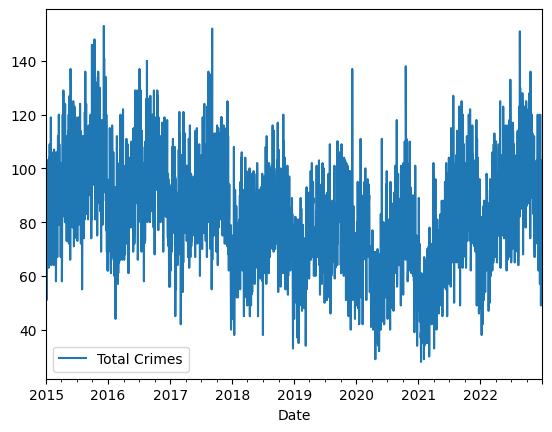

In [12]:
data.plot()

In [24]:
s = setup(data, fold=3, fh=360, session_id=42)

,Description,Value
0,session_id,42
1,Target,Total Crimes
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(2922, 1)"
5,Transformed data shape,"(2922, 1)"
6,Transformed train set shape,"(2562, 1)"
7,Transformed test set shape,"(360, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [25]:
plot_model()

In [27]:
plot_model(plot='train_test_split')

In [30]:
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.9161,0.8868,13.6323,16.8246,0.1955,0.1932,0.0809,5.2067
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.9161,0.8868,13.6323,16.8246,0.1955,0.1932,0.0809,4.8500
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9161,0.8870,13.6324,16.8270,0.1954,0.1932,0.0806,10.3167
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9162,0.8872,13.6341,16.8312,0.1953,0.1932,0.0800,10.5133
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9162,0.8872,13.6341,16.8312,0.1953,0.1932,0.0800,6.3567
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9165,0.8871,13.6379,16.8292,0.1956,0.1933,0.0804,4.8900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.9237,0.8808,13.7412,16.7035,0.2151,0.1934,0.0734,15.0200
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.9369,0.9071,13.9421,17.2098,0.1970,0.1981,0.0399,4.8367
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9376,0.9031,13.9533,17.1352,0.2037,0.1977,0.0454,4.8267
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9495,0.9141,14.1218,17.3304,0.2279,0.1974,-0.0184,4.7533


In [31]:
best

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [35, 34,
                                                                        33, 32,
                                                                        31, 30,
                                                                        29, 28,
                                                                        27, 26,
                                                                        25, 24,
                                                                        23, 22,
                                                                        21, 20,
                                                                        19, 18,
                                                                        17, 16,
                                                                        15, 14,
                                                                        13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, ...]},
                                                   n_jobs=1)],
                    regressor=Lasso(random_state=42), sp=35, window_length=35)

In [32]:
predict_model(best, fh=180)

,y_pred
2022-01-06,73.0820
2022-01-07,70.9815
2022-01-08,57.4904
2022-01-09,60.8029
2022-01-10,80.6876
...,...
2022-06-30,69.4559
2022-07-01,67.5528
2022-07-02,55.2581
2022-07-03,55.9004


In [36]:
plot_model(best, plot='forecast', data_kwargs={'fh':360})

In [37]:
en = create_model('en_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-01-21,0.7099,0.7024,10.6668,13.4217,0.1455,0.1449,0.1614
1,2020-01-16,0.8566,0.8450,12.6205,15.8852,0.2004,0.1854,0.1277
2,2021-01-10,1.1819,1.1135,17.6098,21.1741,0.2402,0.2493,-0.0474
Mean,NaT,0.9161,0.8870,13.6324,16.8270,0.1954,0.1932,0.0806
SD,NaT,0.1972,0.1704,2.9234,3.2342,0.0388,0.0430,0.0915


In [38]:
plot_model(en, plot='forecast', data_kwargs={'fh':360})

In [39]:
tuned_lasso = tune_model(best)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-01-21,0.7105,0.7042,10.6758,13.4549,0.1476,0.1447,0.1572
1,2020-01-16,0.8641,0.8541,12.7319,16.0569,0.2034,0.1870,0.1088
2,2021-01-10,1.2025,1.1309,17.9159,21.5055,0.2457,0.2533,-0.0804
Mean,NaT,0.9257,0.8964,13.7745,17.0058,0.1989,0.1950,0.0619
SD,NaT,0.2055,0.1767,3.0463,3.3544,0.0402,0.0447,0.1025


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


In [40]:
plot_model(tuned_lasso, plot='forecast', data_kwargs={'fh':360})

In [41]:
theta = create_model('theta')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-01-21,1.2472,1.1744,18.7394,22.4389,0.2323,0.2702,-1.3440
1,2020-01-16,0.8493,0.8391,12.5141,15.7737,0.1981,0.1840,0.1400
2,2021-01-10,1.3847,1.3050,20.6318,24.8176,0.2671,0.2959,-0.4388
Mean,NaT,1.1604,1.1062,17.2951,21.0101,0.2325,0.2501,-0.5476
SD,NaT,0.2270,0.1962,3.4678,3.8279,0.0282,0.0478,0.6107


In [42]:
plot_model(theta, plot='forecast', data_kwargs={'fh':360})
